###   Riskify(Credit Score Classifier)
***Simplify risk, amplify trust!***

This script:
- Loads and preprocesses a **financial dataset**
- Trains a **Decision Tree Classifier** to classify Risk on giving loan to loan applicants *(Risky and Not Risky)*
- Evaluates model performance
- Accepts **input** to predict their risk category interactively


In [1]:
#  Import  libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

In [2]:
# ------------------------------------------
# Load and Preprocess the Dataset
# ------------------------------------------

# Load dataset
df = pd.read_csv("data.csv")

# Drop irrelevant columns if present
columns_to_drop = ["ApplicationDate", "RiskScore"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Generate 3-class RiskLabel from CreditScore
# RiskLabel from CreditScore (but NOT use CreditScore as a feature)
if 'RiskLabel' not in df.columns:
    df['RiskLabel'] = df['CreditScore'].apply(lambda x: 'Risky' if x < 580 else 'Not Risky')

In [3]:
# ------------------------------------------
#  Feature Selection
# ------------------------------------------

# Select relevant features for model training
features = [
    'Age', 'MonthlyIncome','TotalDebtToIncomeRatio',
            'LoanAmount', 'LoanDuration', 'BaseInterestRate', 
            'MonthlyDebtPayments', 'TotalLiabilities','MonthlyLoanPayment',
            'TotalAssets', 'NetWorth'
        ]

df = df[features + ['RiskLabel']]

In [4]:
# ------------------------------------------
#  Train-Test Split
# ------------------------------------------

X = df[features]
y = df['RiskLabel']

# Split into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# ------------------------------------------
#  Decision Tree Model Training
# ------------------------------------------

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# ------------------------------------------
#  Model Evaluation
# ------------------------------------------

y_pred = model.predict(X_test)

# Print evaluation metrics
print("\n Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Model Accuracy: 0.99045

 Classification Report:
               precision    recall  f1-score   support

   Not Risky       0.99      0.99      0.99     19468
       Risky       0.99      0.99      0.99     20532

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



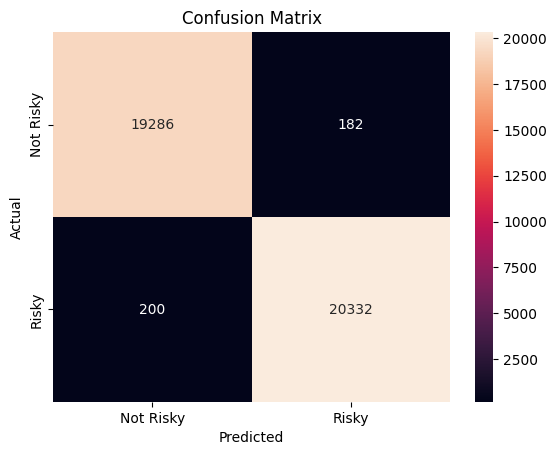

In [8]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.tree import export_text

# Print decision tree rules
tree_rules = export_text(model, feature_names=features)
print(tree_rules)

In [ ]:
# # ------------------------------------------
# #  Random Forest Model Training
# # ------------------------------------------
# modelR = RandomForestClassifier(
#     n_estimators=100,        # Number of trees in the forest
#     max_depth=15,            # Maximum depth of each tree
#     random_state=42,
#     n_jobs=-1                # Use all available CPU cores
# )
# modelR.fit(X_train, y_train)


# # ------------------------------------------
# #  Model Perdiction
# # ------------------------------------------
# y_pred = modelR.predict(X_test)

# # Print evaluation metrics
# print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# # ------------------------------------------
# #  KNN Model Training
# # ------------------------------------------
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y, test_size=0.2, random_state=42
# )

# # Initialize and train KNN model
# knn = KNeighborsClassifier(n_neighbors=18)  # You can tune n_neighbors
# knn.fit(X_train, y_train)

# # ------------------------------------------
# #  Model Perdiction
# # ------------------------------------------
# y_pred = knn.predict(X_test)

# print("KNN Model Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:

# # ------------------------------------------
# #  Predict with User Input
# # ------------------------------------------

# print("\n===  Predicting Risk Category ===")

# def get_user_input():
#     """
#     Collects user input for features used in prediction.
#     Returns:
#         pd.DataFrame: Single-row DataFrame containing user inputs.
#     """
#     user_data = {}

#     # Personal & Employment Information
#     user_data['Age'] = int(input("Age(Years): "))

#     # Income & Account Balances
#     user_data['MonthlyIncome'] = float(input("Monthly Income: "))
#     user_data['SavingsAccountBalance'] = float(input("Savings Account Balance: "))

#     # Loan Information
#     user_data['LoanAmount'] = float(input("Loan Amount: "))
#     user_data['LoanDuration'] = int(input("Loan Duration (months): "))
#     user_data['BaseInterestRate'] = float(input("Base Interest Rate (e.g., 0.05 for 5%): "))
#     user_data['InterestRate'] = float(input("Interest Rate (e.g., 0.05): "))
    
#     # Debt & Liabilities
#     user_data['MonthlyDebtPayments'] = float(input("Monthly Debt Payments: "))
#     user_data['TotalLiabilities'] = float(input("Total Liabilities: "))

#     # Assets & Net Worth
#     user_data['TotalAssets'] = float(input("Total Assets: "))
#     user_data['NetWorth'] = float(input("Net Worth: "))
    
#     return pd.DataFrame([user_data])

# # Collect input and make prediction
# user_df = get_user_input()
# print(user_df)
# prediction = model.predict(user_df)
# print("\nRisk Category:", prediction[0])


In [ ]:
# # To save model

# import joblib

# # Save the trained model to a file
# joblib.dump(model, 'credit_risk_model.pkl')
# print("\nModel saved as 'credit_risk_model.pkl'")

# joblib.dump(modelR, 'random_forest_model.pkl')
# print("\nModel saved as 'random_forest_model.pkl'")

# joblib.dump(knn, 'knn_model.pkl')
# print("\nModel saved as 'knn_model.pkl'")